# Machine Learning in Python

## Simple Linear Regression

### Algorithm:
1. Import relevant pkgs
2. Load the required data
3. Create the first regression
    - Define the dependent and independet variables
    - Explore the data
    - Regression itself
      > $ŷ = b_0x_0 + b_1x_1$
      > , where $x_0 = 1$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# override matplotlib
sns.set() 

In [3]:
data = pd.read_csv('./datasets/1.01. Simple linear regression.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [5]:
y = data['GPA']
x1 = data['SAT']

Text(0.5, 0, 'SAT')

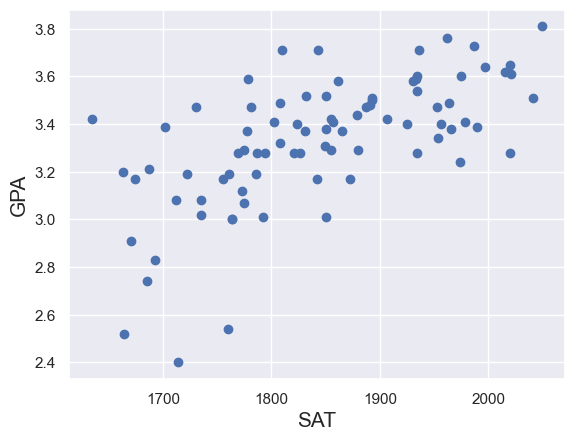

In [6]:
fig, ax = plt.subplots()
ax.scatter(x1,y)
ax.set_ylabel('GPA', fontsize=15)
ax.set_xlabel('SAT', fontsize=15)

In [7]:
x = sm.add_constant(x1)
x

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [27]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           7.20e-11
Time:                        15:35:49   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

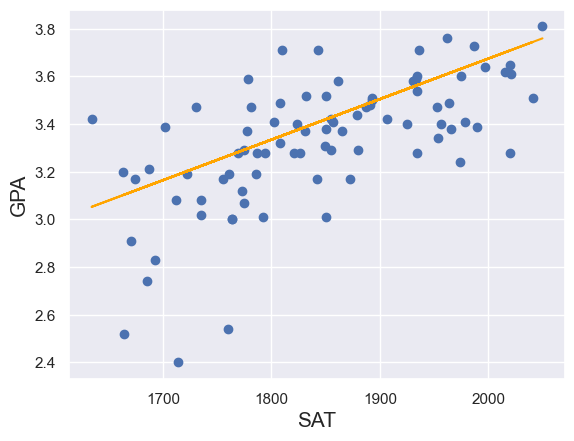

In [8]:
y_hat = 0.2750 + 0.0017*x1

fig, ax = plt.subplots()
ax.scatter(x1,y)
ax.set_ylabel('GPA', fontsize=15)
ax.set_xlabel('SAT', fontsize=15)
ax.plot(x1, y_hat, c='orange', label='regression line')


#### Caveat:

Total Variability (SST) = Explained Variability (SSR) + Unexplained Variability (SSE)

Total Variability: $\sum_{i=1}^{n}(y_i - \overline{y})^2$

Explained Variability: $\sum_{i=1}^{n}(ŷ_i - \overline{y})^2$

Unexplained Variability: $\sum_{i=1}^{n}e^2$

Therefore:

$\sum_{i=1}^{n}(y_i - \overline{y})^2$ = $\sum_{i=1}^{n}(ŷ_i - \overline{y})^2$ + $\sum_{i=1}^{n}e^2$

## Multiple Linear Regression

$ŷ = b_0x_0 + b_1x_1 + b_2x_2 + ... + b_kx_k + \epsilon$

$ŷ = b_0x_0 + \sum_{i=1}^{n}b_ix_i + \epsilon$

### Algorithm:
1. Import relevant pkgs
2. Load the required data
3. Create the first regression

In [27]:
data = pd.read_csv('./datasets/1.02. Multiple linear regression.csv')
data

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [28]:
y = data['GPA']
x1 = data[['SAT','Rand 1,2,3']]

In [29]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           6.58e-10
Time:                        16:35:20   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""